In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix
from sklearn.utils import resample
import math
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# df = pd.read_pickle('/kaggle/input/enron-subset/all_enron_emails_preprocessed.pkl')
df = pd.read_pickle('../data/all_enron_emails_preprocessed.pkl')

In [3]:
df.drop(['responses', 'is_reply'], axis=1, inplace=True)
df.fillna(0, inplace=True)

In [4]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
y_train = train['answered']
X_train = train.drop(columns='answered')
y_test = test['answered']
X_test = test.drop(columns='answered')

In [9]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [12]:
gb_model = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'min_samples_leaf': [1, 2]
}
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END learning_rate=0.01, min_samples_leaf=1, n_estimators=50; total time=19.1min
[CV] END learning_rate=0.01, min_samples_leaf=1, n_estimators=100; total time=38.6min
[CV] END learning_rate=0.01, min_samples_leaf=2, n_estimators=100; total time=38.6min
[CV] END learning_rate=0.1, min_samples_leaf=1, n_estimators=50; total time=19.8min
[CV] END learning_rate=0.1, min_samples_leaf=2, n_estimators=50; total time=19.7min
[CV] END learning_rate=0.1, min_samples_leaf=2, n_estimators=50; total time=21.3min
[CV] END learning_rate=0.01, min_samples_leaf=1, n_estimators=50; total time=19.4min
[CV] END learning_rate=0.01, min_samples_leaf=2, n_estimators=50; total time=19.5min
[CV] END learning_rate=0.01, min_samples_leaf=2, n_estimators=50; total time=19.7min
[CV] END learning_rate=0.1, min_samples_leaf=1, n_estimators=50; total time=19.8min
[CV] END learning_rate=0.1, min_samples_leaf=1, n_estimators=50; total time=20.0min
[CV] END

In [13]:
models = {
    'Gradient Boosting': best_gb,
}

In [14]:
print(grid_search_gb.best_params_)
print(grid_search_gb.best_estimator_)

{'learning_rate': 0.1, 'min_samples_leaf': 1, 'n_estimators': 100}
GradientBoostingClassifier(random_state=42)


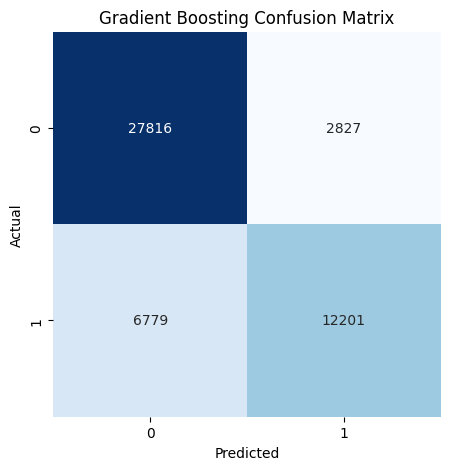

Saved Gradient Boosting model as Gradient Boosting_model.pkl



In [15]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title(f'Gradient Boosting Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    model_name = f'{name}_model.pkl'
    joblib.dump(model, model_name)
    print(f'Saved {name} model as {model_name}\n')